# Substructures & substructure filters

In addition to the descriptors introduced in the previous notebooks, determining whether a given chemical structure contains specific substructures or structural patterns can provide additional ways to characterize a set of structures, and filter it if desired. Also, substructure search is a core feature in most chemical databases. When you prepare chemical databases of your own, you should definitely consider implementing it :)

Now, for our usual boilerplate:

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole

import csv
import pandas as pd

import seaborn as sns

# What to do

 - again, load your own ligand set as well as DrugBank
 - try out the SMARTS-based substructure search on your own data
 - familiarize yourself with the notion of substructure search, if you haven't already from the lectures or other courses. Have a look at the linked resources.
 - Here, we tested our set and DrugBank for the -COOH functional group. Define your own SMARTS substructure, prefereably some functional group like -NH2, =O, etc. Run the substructure as a query on your own set, and against DrugBank. Any interesting outcome?
 - Have a look at PAINS. If you don't know them already, read up on the concept in the linked resources.
 - Scan your set for PAINS, have a look of how many of your structures have those substructures, and which ones. If you filter those structures out, how much would your set of structures shrink?
 - Bonus question: you might have noticed that extensive substructure searches take some time. Based on your experience and/or linked materials, any tips on why that might be? Any ideas on possible pre-filtering methods to speed things up?

In [2]:
# let's have a look at the csv:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
raw_df.head()

# odstraneni dat, ktere nemaji IC50 nebo maji jinou jednotku nez nM,
# tim se odstrani data, ktere nemaji Smiles
df = raw_df[(raw_df['Standard Units'] == 'nM')]
print(len(df.index))
print(df.isnull().sum())

3193
Molecule ChEMBL ID               0
Molecule Name                 2669
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                           0
Standard Type                    0
Standard Relation                0
Standard Value                   0
Standard Units                   0
pChEMBL Value                 1295
Data Validity Comment         2924
Comment                       3154
Uo Units                         0
Ligand Efficiency BEI         1436
Ligand Efficiency LE          1436
Ligand Efficiency LLE         1436
Ligand Efficiency SEI         1436
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Na

In [3]:
cox_ligands = [Chem.MolFromSmiles(smiles) for smiles in df['Smiles']]

Load MTOR

In [4]:
# load your own set, and DrugBank :)
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

Load DrugBank

In [5]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [15:25:39] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:25:39] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [15:25:39] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:25:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:25:40] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [15:25:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:25:40] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [15:25:40] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [15:25:40] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [15:25:40] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [15:25:40] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [15:25:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:25:42] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:25:42] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:25:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:25:42] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:25:42] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [15:25:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:25:42] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:25:42] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [15:25:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:25:42] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [15:25:43] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:25:44] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:25:44] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:25:44] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:25:45] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:25:45] ERROR: Could not sanitize molecule ending on line 1151592


## Basic substruct search

The simplest use of this concept is to determine whether a given chemical structure contains a given substructure. Substructure patterns can be defined using [SMARTS notation](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html), which is kind of like a [regular expression](https://en.wikipedia.org/wiki/Regular_expression) for chemical structures, i.e. SMARTS are to SMILES what regex are to strings. The materials provided as part of the actual lectures will probably have more theory about SMARTS, substructure search in general, as well as the underlying [graph theory aspects](https://en.wikipedia.org/wiki/Subgraph_isomorphism_problem). For some more applied info, the [RDKit intro](https://www.rdkit.org/docs/GettingStartedInPython.html) and [RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html) go into good detail about substructure search.

In [37]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()

    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])

    print("PAINS:")
    display(pattern)
    print("ligand:")
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))
    print("-------------------------------------------------")

Looks legit. How about something more practical, like COOH groups?

In [7]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(cox_ligands)
res

In [8]:
Chem.MolToSmiles(Chem.MolFromSmarts(res.smartsString))

'CC'

In [9]:
res.smartsString

'[#6]-,:[#6]'

Spolecna substruktura pro vsechny latky v mnozine COX je ve smilesu CC, coz je nic moc

Najdu rucne funkcni skupinu

/home/simik/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


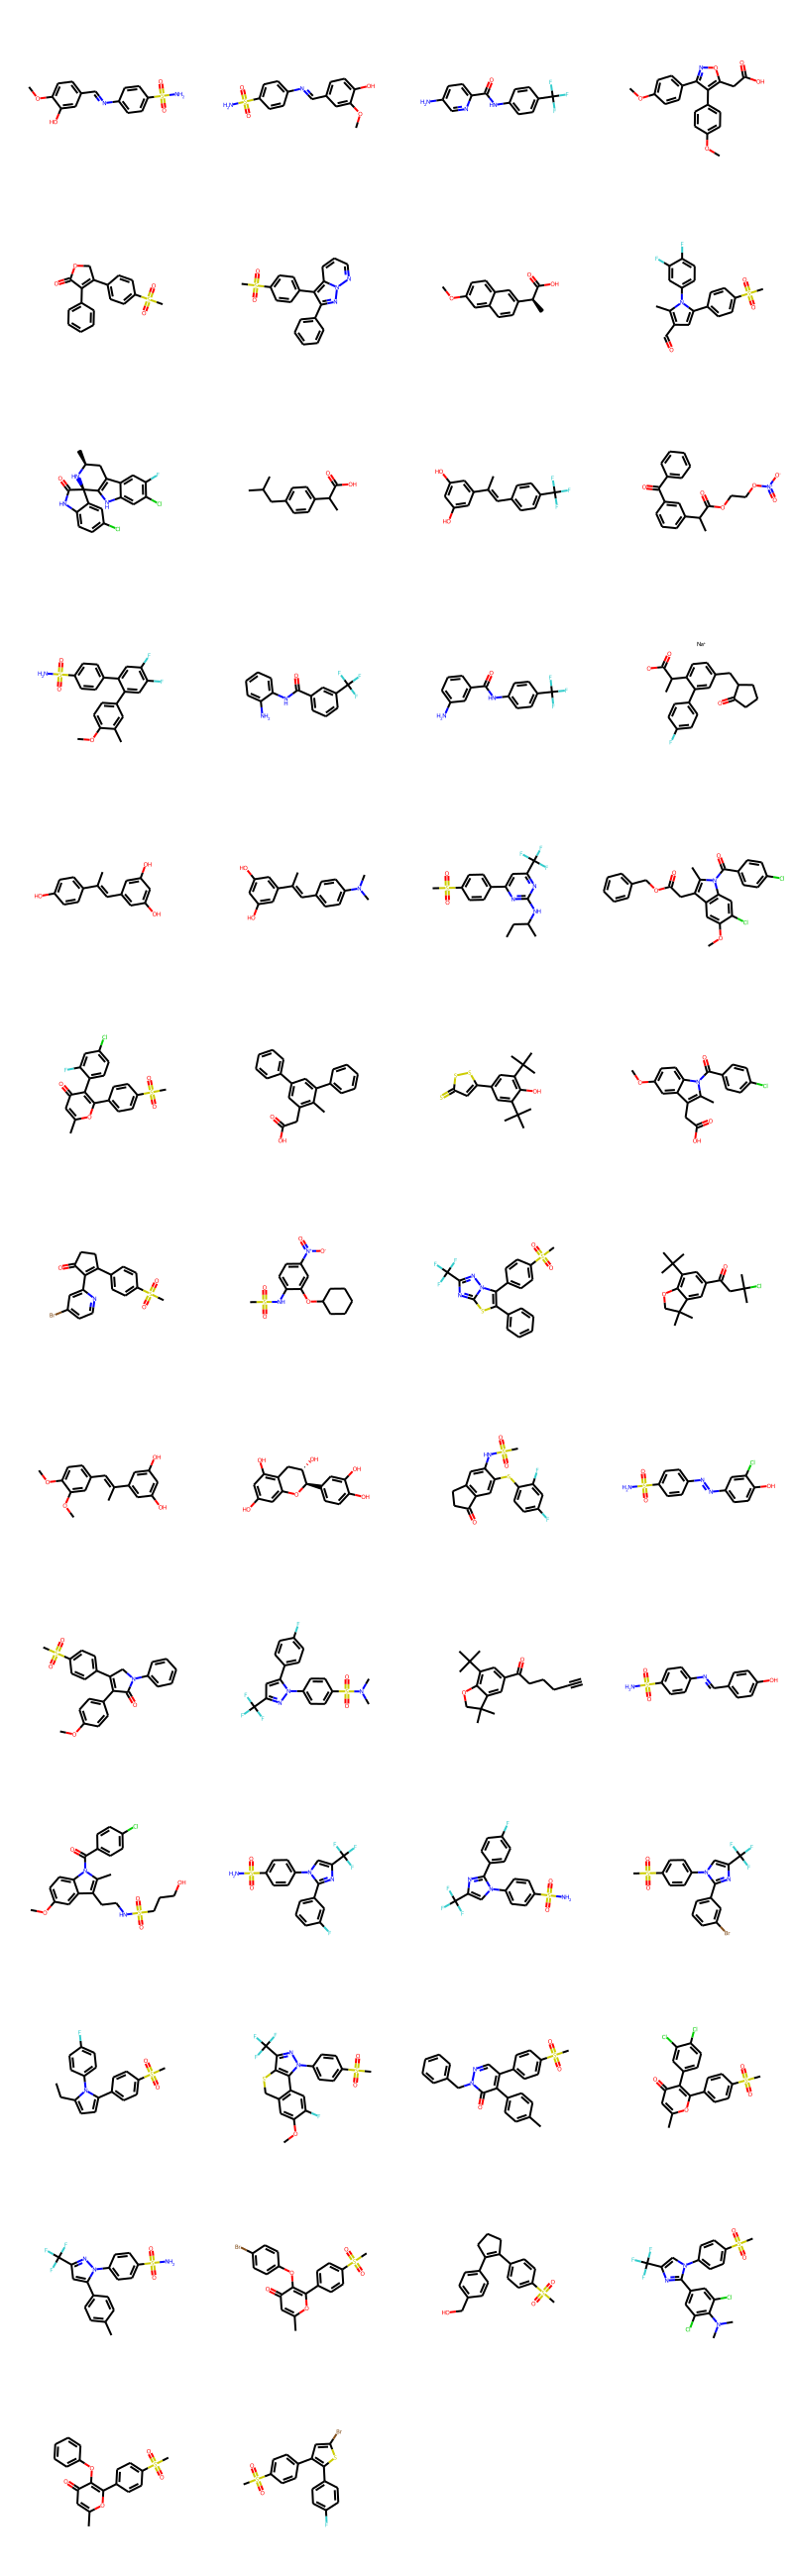

In [10]:
from rdkit.Chem import Draw

#print(ligand_rings[:100])
img=Draw.MolsToGridImage(cox_ligands[:101],molsPerRow=4,subImgSize=(200,200))   
img

Now, let's have a look how many structures with **COOH** groups are in our **COX** ligand set, **MTOR** set and **DrugBank** set:

In [17]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')

In [18]:
pattern = Chem.MolFromSmarts('C(=O)[O;h1]')

cooh_counts_cox = [len(m.GetSubstructMatches(pattern)) for m in cox_ligands]
cooh_counts_cox_nonzero = [m for m in cooh_counts_cox if m]
print("Pocet ligandu v COX1 mnozine:\t\t\t",len(cooh_counts_cox),"\nPocet struktur, ktere maji COOH skupinu:\t", len(cooh_counts_cox_nonzero),"\t=  ",round(len(cooh_counts_cox_nonzero)/len(cooh_counts_cox)*100,2),"%","\nPrumerny pocet COOH skupin na jednu molekulu:\t", sum(cooh_counts_cox_nonzero)/len(cooh_counts_cox_nonzero),"\n\nPS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)")

Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji COOH skupinu:	 475 	=   14.88 % 
Prumerny pocet COOH skupin na jednu molekulu:	 1.0084210526315789 

PS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)


In [19]:
cooh_counts_mtor = [len(m.GetSubstructMatches(cooh_pattern)) for m in mtor_ligands]
cooh_counts_mtor_nonzero = [m for m in cooh_counts_mtor if m]
print("Pocet ligandu v MTOR mnozine:\t\t\t",len(cooh_counts_mtor),"\nPocet struktur, ktere maji COOH skupinu:\t", len(cooh_counts_mtor_nonzero),"\t=  ",round(len(cooh_counts_mtor_nonzero)/len(cooh_counts_mtor)*100,2),"%","\nPrumerny pocet COOH skupin na jednu molekulu:\t", sum(cooh_counts_mtor_nonzero)/len(cooh_counts_mtor_nonzero),"\n\nPS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)")

Pocet ligandu v MTOR mnozine:			 4596 
Pocet struktur, ktere maji COOH skupinu:	 24 	=   0.52 % 
Prumerny pocet COOH skupin na jednu molekulu:	 1.0 

PS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)


In [20]:
cooh_counts_drugbank = [len(m.GetSubstructMatches(cooh_pattern)) for m in drugs]
cooh_counts_drugbank_nonzero = [m for m in cooh_counts_drugbank if m]
print("Pocet ligandu v DrugBank mnozine:\t\t\t",len(cooh_counts_drugbank),"\nPocet struktur, ktere maji COOH skupinu:\t", len(cooh_counts_drugbank_nonzero),"\t=  ",round(len(cooh_counts_drugbank_nonzero)/len(cooh_counts_drugbank)*100,2),"%","\nPrumerny pocet COOH skupin na jednu molekulu:\t", sum(cooh_counts_drugbank_nonzero)/len(cooh_counts_drugbank_nonzero),"\nMaximalni pocet COOH skupin v jedne molekule:\t",max(cooh_counts_drugbank_nonzero),"\n\nPS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)")

Pocet ligandu v DrugBank mnozine:			 7115 
Pocet struktur, ktere maji COOH skupinu:	 1635 	=   22.98 % 
Prumerny pocet COOH skupin na jednu molekulu:	 1.2574923547400612 
Maximalni pocet COOH skupin v jedne molekule:	 8 

PS: (prumerny pocet COOH skupin na molekuly, ktere obsahuji COOH skupinu)


Apparently, COOH group is much more common in DrugBank, and quite a few structures from DrugBank have more than a single COOH group. There is at least one with 8 COOH groups

Now, let's have a look how many structures with **SOON** groups are in our **COX** ligand set, **MTOR** set and **DrugBank** set: 

In [21]:
# SMARTS-based chemical substructures are instantiated much like the standard SMILES-based mol instances:
soo_pattern = Chem.MolFromSmarts('[S](=O)(=O)N')

PAINS:


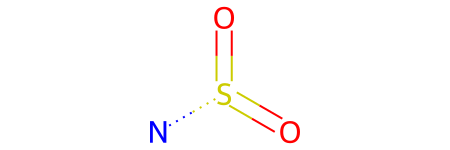

ligand:


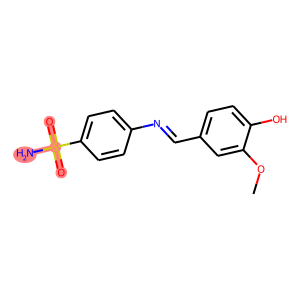

In [22]:
# and test our first substruct search
cox_first_structure = cox_ligands[1] # a direct superstructure of ethanol
#cox_first_structure.HasSubstructMatch(soo_pattern)

visualize_match(cox_ligands[1], soo_pattern)

Structures with **SOON** groups are in our **COX** ligand set, **MTOR** set and **DrugBank** set:

In [23]:
soon_pattern = Chem.MolFromSmarts('[S](=O)(=O)N')

soon_counts_cox = [len(m.GetSubstructMatches(soon_pattern)) for m in cox_ligands]
soon_counts_cox_nonzero = [m for m in soon_counts_cox if m]
print("Pocet ligandu v COX1 mnozine:\t\t\t",len(soon_counts_cox),"\nPocet struktur, ktere maji SOON skupinu:\t", len(soon_counts_cox_nonzero),"\t=",round(len(soon_counts_cox_nonzero)/len(soon_counts_cox)*100,2),"%","\nPrumerny pocet SOON skupin na jednu molekulu:\t", sum(soon_counts_cox_nonzero)/len(soon_counts_cox_nonzero),"\nMaximalni pocet SOON skupin v jedne molekule:\t",max(soon_counts_cox_nonzero),"\n\nPS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)")

Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji SOON skupinu:	 843 	= 26.4 % 
Prumerny pocet SOON skupin na jednu molekulu:	 1.0166073546856464 
Maximalni pocet SOON skupin v jedne molekule:	 2 

PS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)


In [24]:
soon_counts_mtor = [len(m.GetSubstructMatches(soon_pattern)) for m in mtor_ligands]
soon_counts_mtor_nonzero = [m for m in soon_counts_mtor if m]
print("Pocet ligandu v MTOR mnozine:\t\t\t",len(soon_counts_mtor),"\nPocet struktur, ktere maji SOON skupinu:\t", len(soon_counts_mtor_nonzero),"\t=  ",round(len(soon_counts_mtor_nonzero)/len(soon_counts_mtor)*100,2),"%","\nPrumerny pocet SOON skupin na jednu molekulu:\t", sum(soon_counts_mtor_nonzero)/len(soon_counts_mtor_nonzero),"\n\nPS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)")

Pocet ligandu v MTOR mnozine:			 4596 
Pocet struktur, ktere maji SOON skupinu:	 422 	=   9.18 % 
Prumerny pocet SOON skupin na jednu molekulu:	 1.0592417061611374 

PS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)


In [25]:
soon_counts_drugbank = [len(m.GetSubstructMatches(soon_pattern)) for m in drugs]
soon_counts_drugbank_nonzero = [m for m in soon_counts_drugbank if m]
print("Pocet ligandu v DrugBank mnozine:\t\t\t",len(soon_counts_drugbank),"\nPocet struktur, ktere maji SOON skupinu:\t", len(soon_counts_drugbank_nonzero),"\t=  ",round(len(soon_counts_drugbank_nonzero)/len(soon_counts_drugbank)*100,2),"%","\nPrumerny pocet SOON skupin na jednu molekulu:\t", sum(soon_counts_drugbank_nonzero)/len(soon_counts_drugbank_nonzero),"\nMaximalni pocet SOON skupin v jedne molekule:\t",max(soon_counts_drugbank_nonzero),"\n\nPS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)")

Pocet ligandu v DrugBank mnozine:			 7115 
Pocet struktur, ktere maji SOON skupinu:	 463 	=   6.51 % 
Prumerny pocet SOON skupin na jednu molekulu:	 1.125269978401728 
Maximalni pocet SOON skupin v jedne molekule:	 3 

PS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)


SOON group is much more common in COX1 set. There is at least one compounds with 2 SOON groups, let's have a look at it:

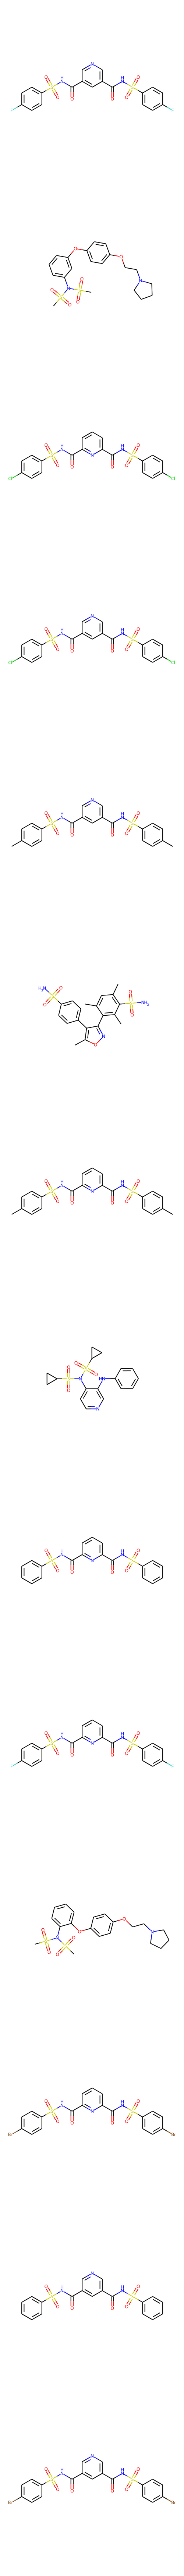

In [26]:
from rdkit.Chem import PropertyMol

lots_of_soon = [m for m, i in zip(cox_ligands, soon_counts_cox) if i == 2]
str(lots_of_soon)
# Molecule ChEMBL ID, Molecule Name 
Draw.MolsToGridImage(lots_of_soon, molsPerRow=1, subImgSize=(500,500))

So, an experimental [organometallic](https://www.drugbank.ca/drugs/DB02832) thing, an [oligopeptide-like monster](https://www.drugbank.ca/drugs/DB05413) developed against HIV and a [very polycyclic](https://www.drugbank.ca/drugs/DB06206) approved selective muscle relaxant. At least the latter two probably have to be injected.

Let's make a less generic DrugBank query:

# PAINS
In addition to our custom queries, there are also established lists of substructures put together for a specific purpose. Widely used, and widely discussed are the PAINS, or [PAn -Assay INterference compoundS](https://www.nature.com/news/chemistry-chemical-con-artists-foil-drug-discovery-1.15991). These are structural patterns that are known to interfere with the mechanism of assays used to screen for substances with a desired biological activity. These structures are likely to come up as false positivies in assays, and might become a trap that consumes time and resources of those unfamiliar with those factors. As always in cheminformatics, PAINS are not a panacea and should be used [with care](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5778390/). They are definitively red flags, though, and you should be definitely aware of them. As shown in the Nature article:

![PAINS](../data/pix/pains.jpg)
![PAINS2](../data/pix/pains2.jpg)

Let's load up some of those PAINS, and see whether your sets of ligands have any of them :)

In [27]:
from itertools import chain

# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x7f24b45a7c60>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4546940>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145ad0>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145b70>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145bc0>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145c60>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145d00>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145d50>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145da0>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145e40>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145ee0>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4145f30>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4151030>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b41510d0>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f24b4151170>, '

So, we have parsed over 400 known PAINS, in a list of (pattern, patternname) pairs. Let's scan our MTOR set, you process yours... substruct search is expensive, so it might take a while :)

In [28]:
for i in range(len(cox_ligands)): # for each ligand
    # add a variable that stores indices of all PAINS patterns that match it
    cox_ligands[i].pain_hits = [j for j, pain in enumerate(pains) if cox_ligands[i].HasSubstructMatch(pain[0])]

cox_with_pains = [cox_ligands[i] for i in range(len(cox_ligands)) if cox_ligands[i].pain_hits]
cox_with_pains

In [29]:
# pocet struktur, ktere obsahuji pain
len(cox_with_pains)

38

Apparently, there is 38 structures with PAINS among the KNOWN ligands. Let's have a closer look:

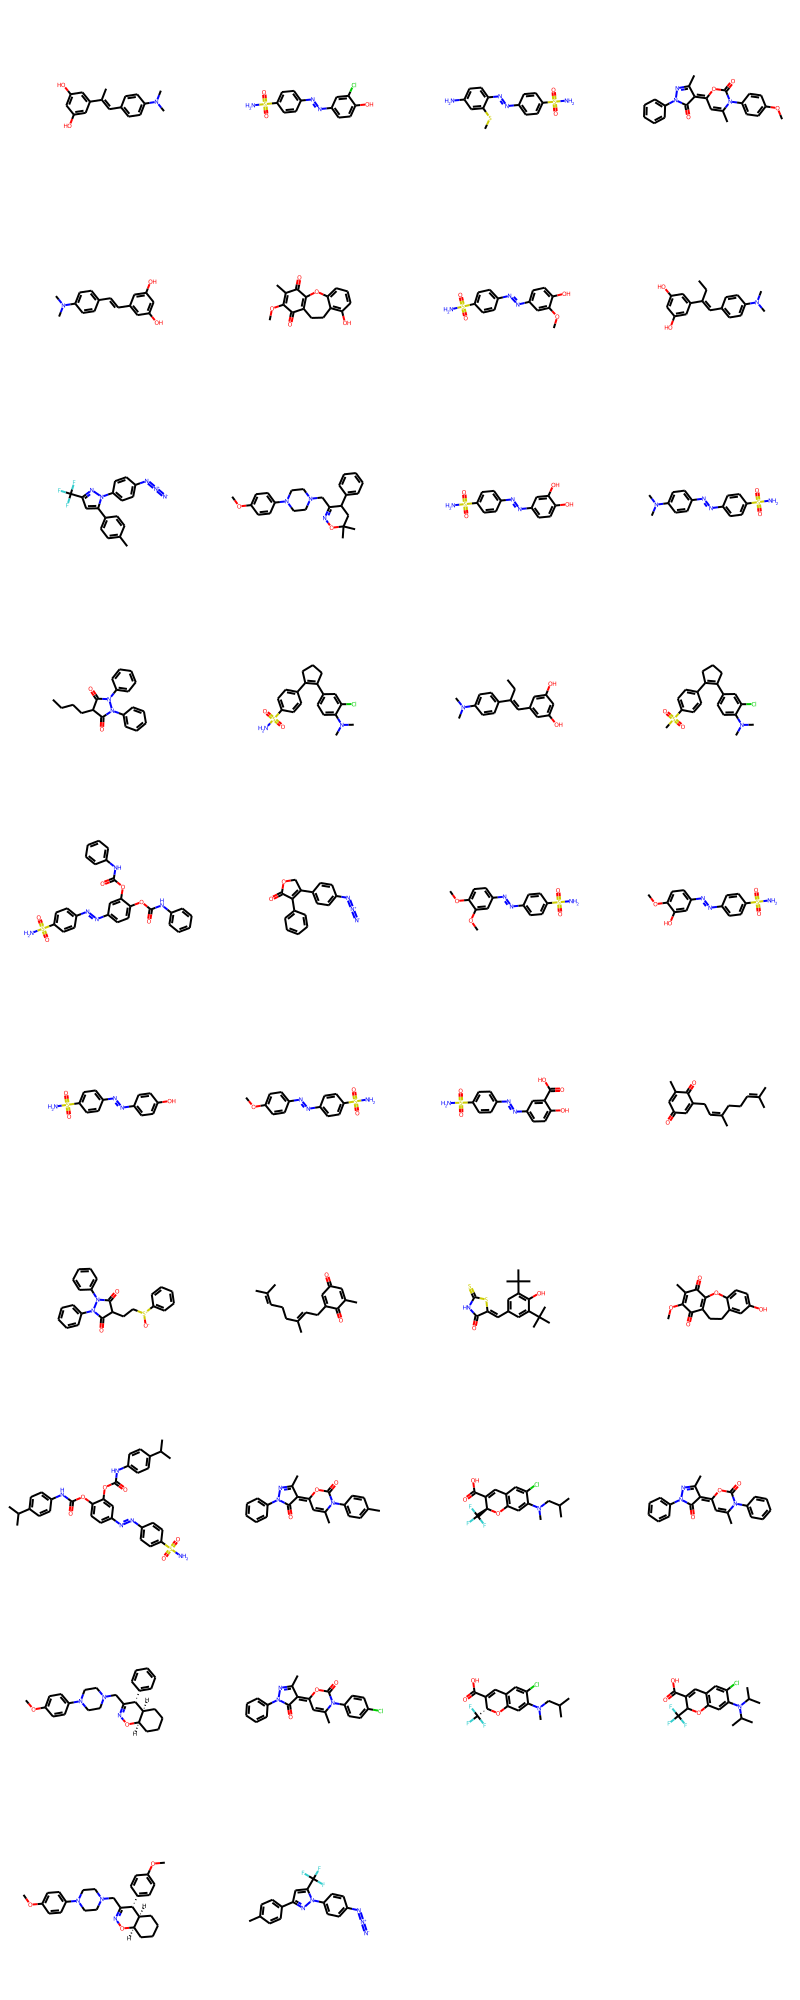

In [30]:
img=Draw.MolsToGridImage(cox_with_pains,molsPerRow=4,subImgSize=(200,200))   
img

 What PAINS did it trigger?

PAINS:


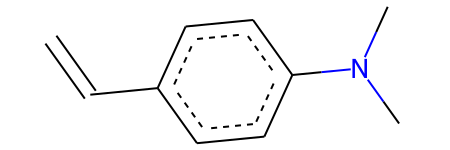

ligand:


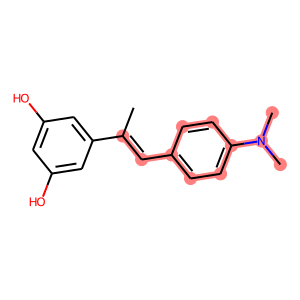

-------------------------------------------------
PAINS:


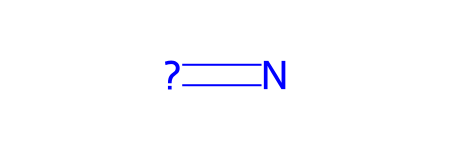

ligand:


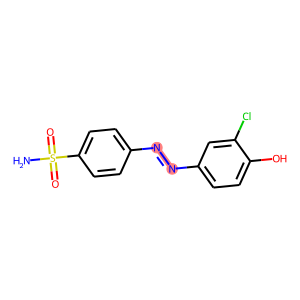

-------------------------------------------------
PAINS:


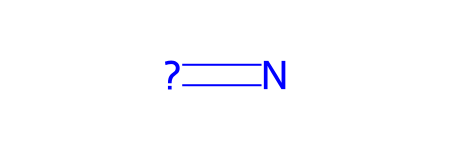

ligand:


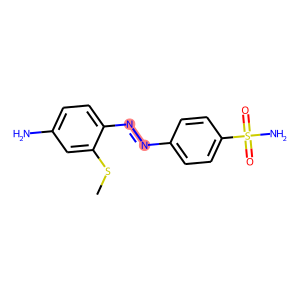

-------------------------------------------------
PAINS:


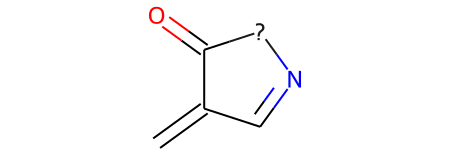

ligand:


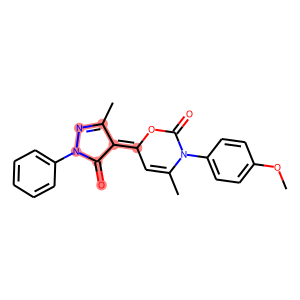

-------------------------------------------------
PAINS:


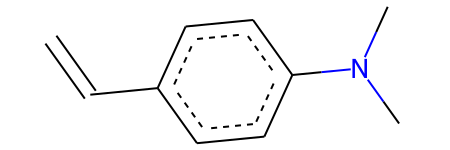

ligand:


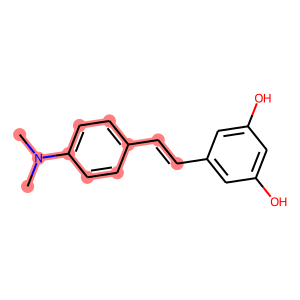

-------------------------------------------------
PAINS:


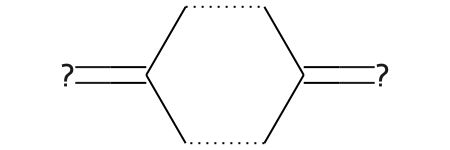

ligand:


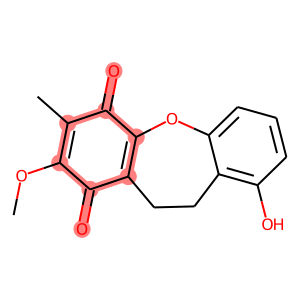

-------------------------------------------------
PAINS:


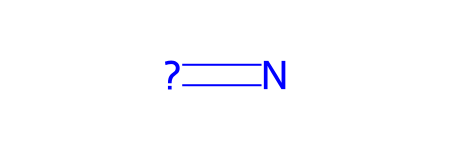

ligand:


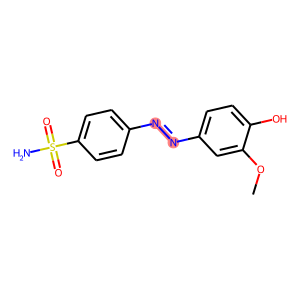

-------------------------------------------------
PAINS:


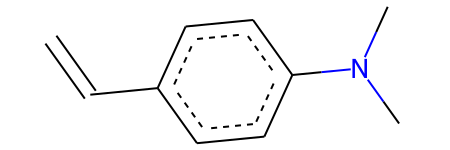

ligand:


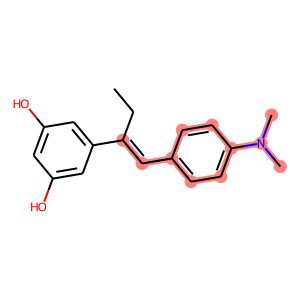

-------------------------------------------------
PAINS:


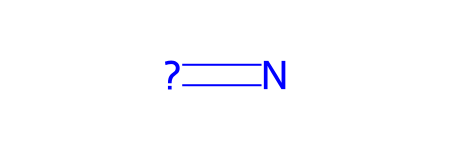

ligand:


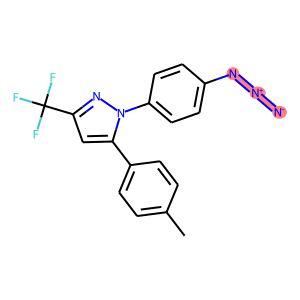

-------------------------------------------------
PAINS:


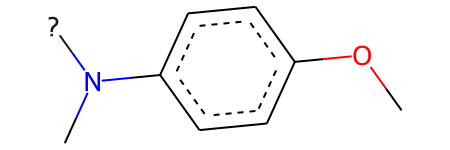

ligand:


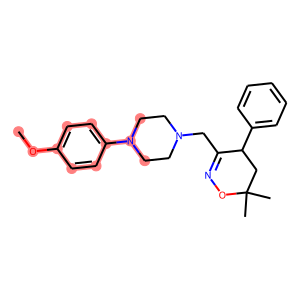

-------------------------------------------------
PAINS:


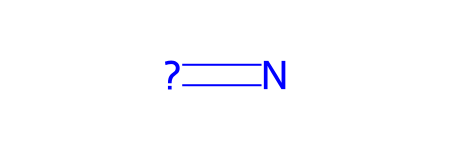

ligand:


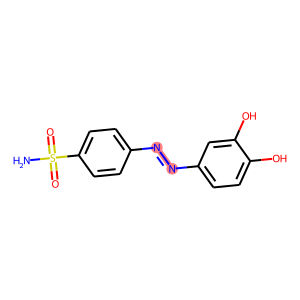

-------------------------------------------------
PAINS:


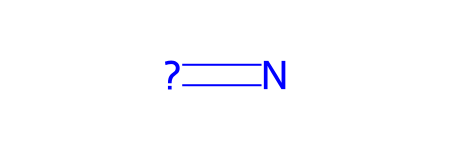

ligand:


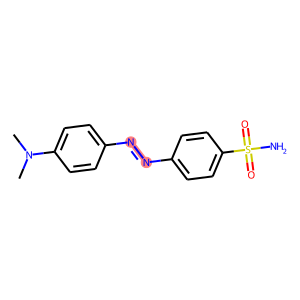

-------------------------------------------------
PAINS:


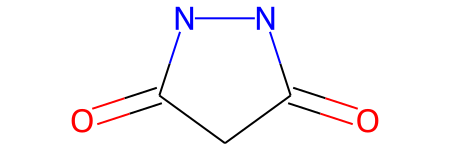

ligand:


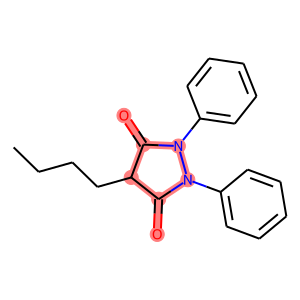

-------------------------------------------------
PAINS:


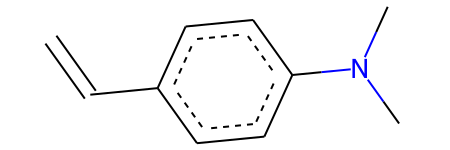

ligand:


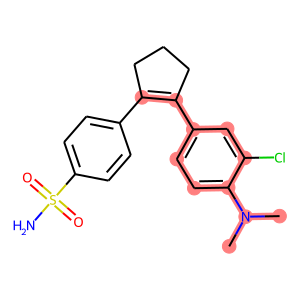

-------------------------------------------------
PAINS:


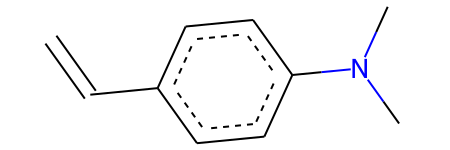

ligand:


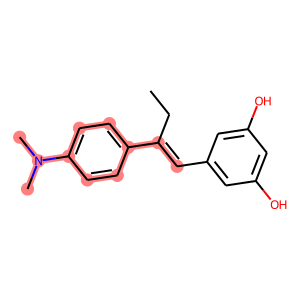

-------------------------------------------------
PAINS:


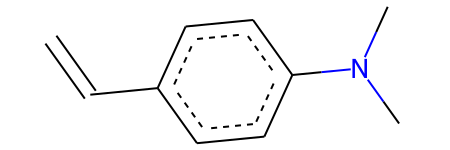

ligand:


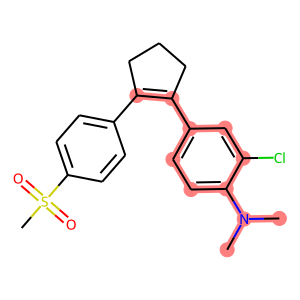

-------------------------------------------------
PAINS:


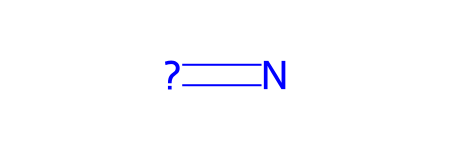

ligand:


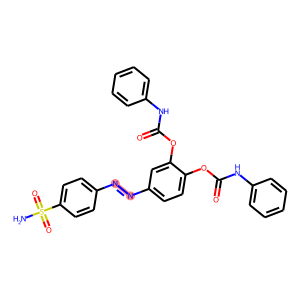

-------------------------------------------------
PAINS:


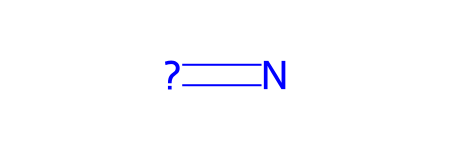

ligand:


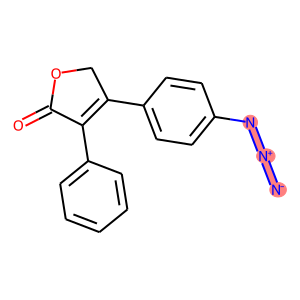

-------------------------------------------------
PAINS:


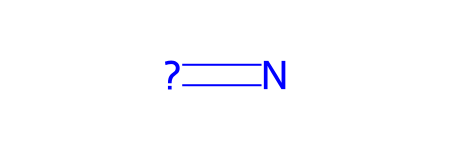

ligand:


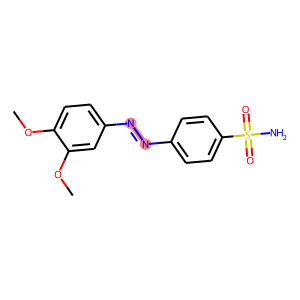

-------------------------------------------------
PAINS:


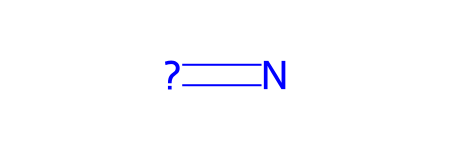

ligand:


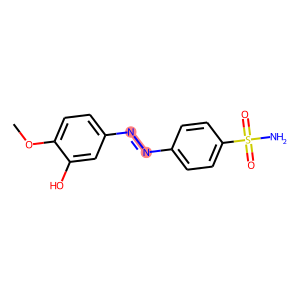

-------------------------------------------------
PAINS:


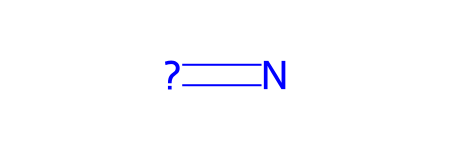

ligand:


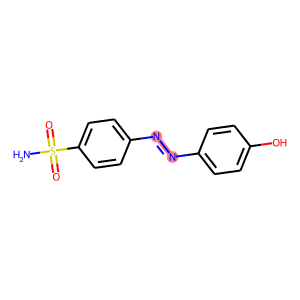

-------------------------------------------------
PAINS:


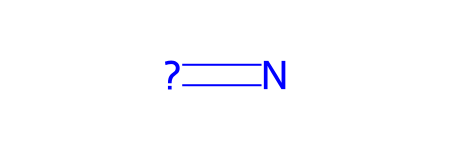

ligand:


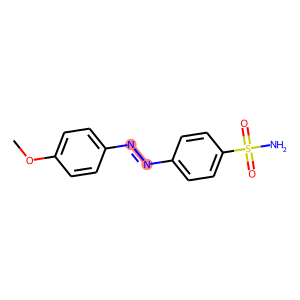

-------------------------------------------------
PAINS:


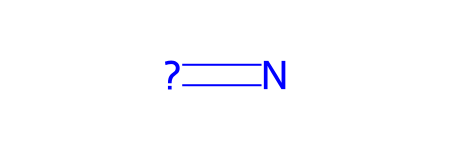

ligand:


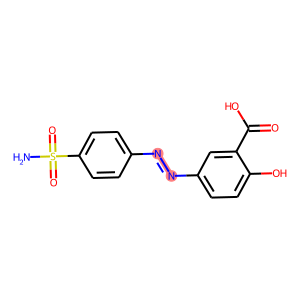

-------------------------------------------------
PAINS:


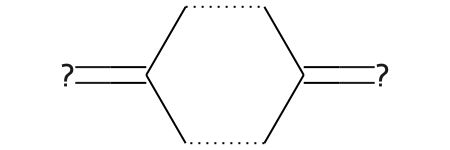

ligand:


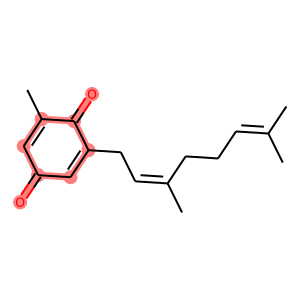

-------------------------------------------------
PAINS:


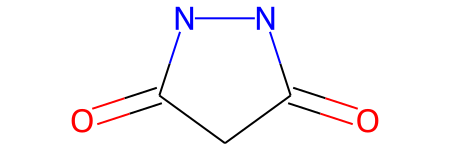

ligand:


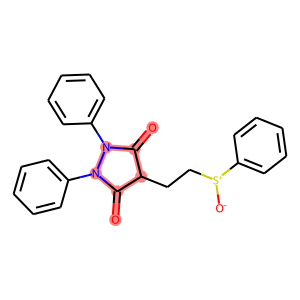

-------------------------------------------------
PAINS:


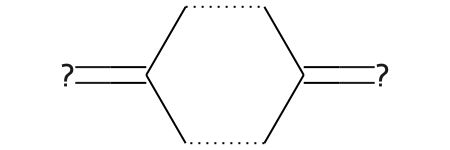

ligand:


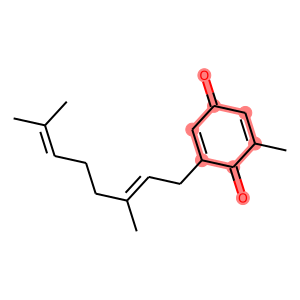

-------------------------------------------------
PAINS:


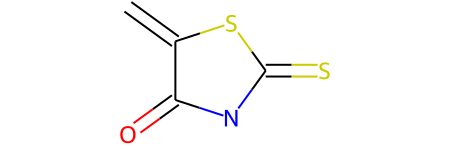

ligand:


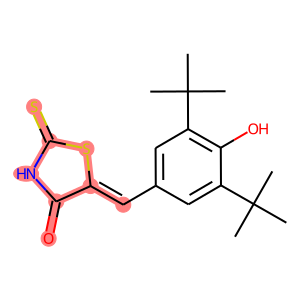

-------------------------------------------------
PAINS:


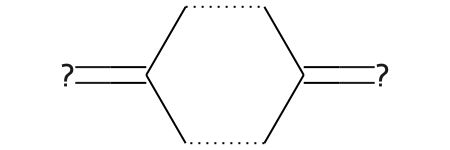

ligand:


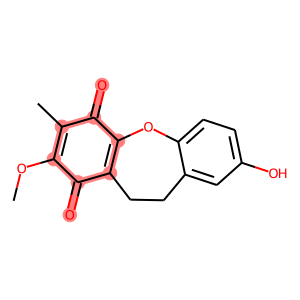

-------------------------------------------------
PAINS:


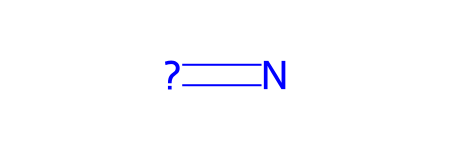

ligand:


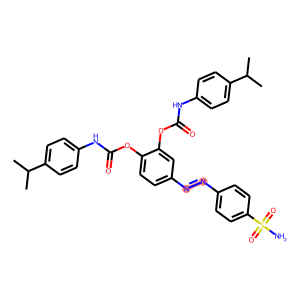

-------------------------------------------------
PAINS:


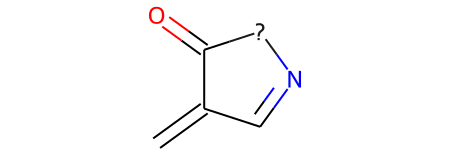

ligand:


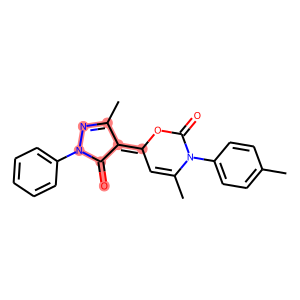

-------------------------------------------------
PAINS:


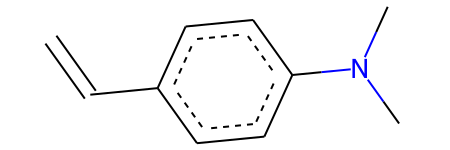

ligand:


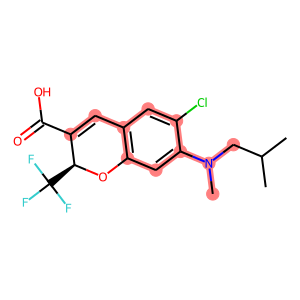

-------------------------------------------------
PAINS:


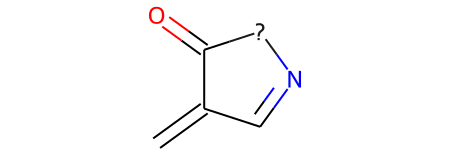

ligand:


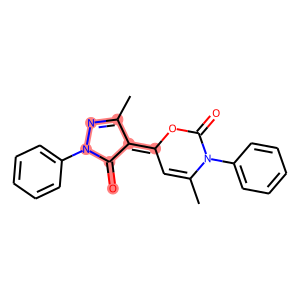

-------------------------------------------------
PAINS:


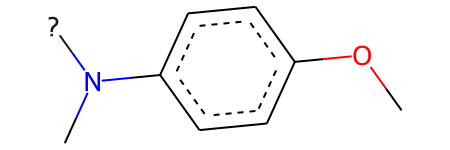

ligand:


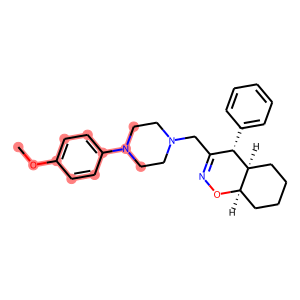

-------------------------------------------------
PAINS:


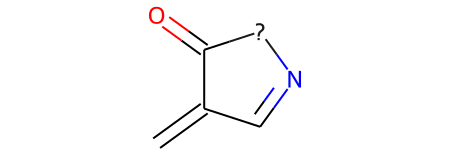

ligand:


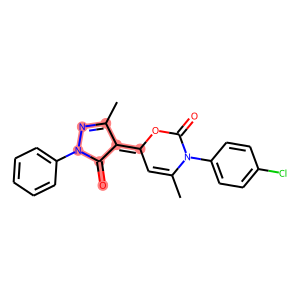

-------------------------------------------------
PAINS:


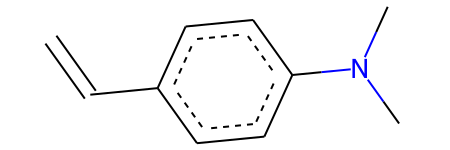

ligand:


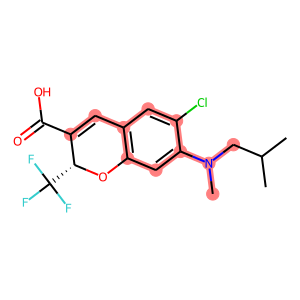

-------------------------------------------------
PAINS:


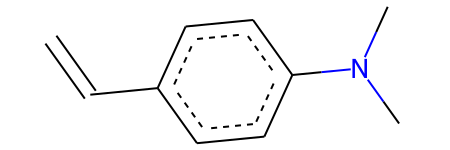

ligand:


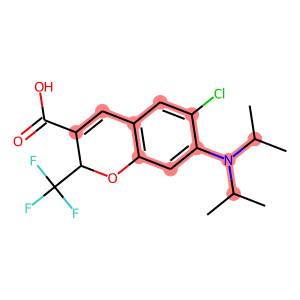

-------------------------------------------------
PAINS:


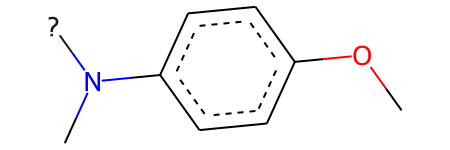

ligand:


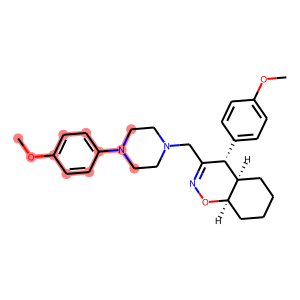

-------------------------------------------------
PAINS:


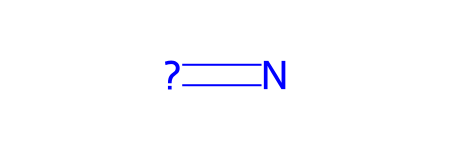

ligand:


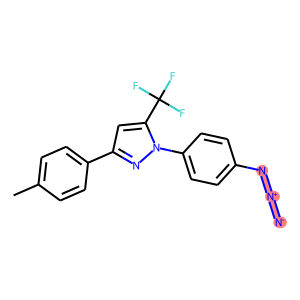

-------------------------------------------------


In [38]:
for i in range(len(cox_with_pains)):
    pattern = pains[cox_with_pains[i].pain_hits[0]][0] 
    structure = cox_with_pains[i]
    
    visualize_match(structure, pattern)

How do your ligand sets fare? Any PAINS, how many, which ones?

38

Odfiltrovani struktur, ktere obsahuji PAINS

In [32]:
print(cox_with_pains[i])
print(cox_ligands[i])

In [33]:
cox_ligands_pure = [cox_ligands[i] for i in range(len(cox_ligands)) if cox_ligands[i] not in cox_with_pains]

In [34]:
print("Pocet vyfiltrovanych ligandu, ktere uz nebsahuji PAIN:")
print(len(cox_ligands), "-", len(cox_with_pains), "=", len(cox_ligands) - len(cox_with_pains))
print("\nKontrola, pocet ligandu bez pains:\t",len(cox_ligands_pure))

Pocet vyfiltrovanych ligandu, ktere uz nebsahuji PAIN:
3193 - 38 = 3155

Kontrola, pocet ligandu bez pains:	 3155


V poradku pocet sedi, jeste otestuji

In [35]:
for i in range(len(cox_ligands_pure)): # for each ligand
    # add a variable that stores indices of all PAINS patterns that match it
    cox_ligands_pure[i].pain_hits = [j for j, pain in enumerate(pains) if cox_ligands_pure[i].HasSubstructMatch(pain[0])]

cox_pure_with_pains = [cox_ligands_pure[i] for i in range(len(cox_ligands_pure)) if cox_ligands_pure[i].pain_hits]
cox_pure_with_pains

[]

In [36]:
len(cox_pure_with_pains)

0

V poradku, mam datovou sadu bez PAINS

**Bonusová otázka:** 
- možná jste si všimli, že rozsáhlé vyhledávání spodní stavby nějakou dobu trvá.
- Na základě vašich zkušeností a / nebo propojených materiálů, nějaké tipy, proč by to mohlo být? 
- Nějaké nápady na možné metody předběžného filtrování, jak věci urychlit?

Tipovala bych na to, ze to dlouho trva, protoze prochazime postupne vsechny slouceniny z nasi mnoziny a pak se prochazi vsechny PAINS a a prochazi se cela molekula, kde se PAINS nachazi, takze to prochazeni znamena exponencialni slozitost asi.

Mozna bych sla cestou, ze si zkusim najit latky podobne strukture uz latkam pouzivanym jako leky, to bych si odfiltrovala jako prvni.

Pak bych si zbyle latky sesortovala podle podobnosti a do nejakych trid a vzdy vybrala nejakeho zastupce/reprezentatnata, na kterem bych hledala PAINS, pokud by nalezlo, odstranila bych skupinu latek pro daneho reprezentanta.